file for generating points that can be used to sample the low resolution file

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

In [75]:
sys.path.append('../')
import datasets
import models
import utils

In [76]:
# Define the number of points
num_long_points = 8
num_lat_points = 16

In [77]:
# Generate list of tuples with evenly spaced points
lowres_locs = [[x, y] for x in range(-180, 180, 360 // num_lat_points) for y in range(-90, 91, 180 // num_long_points)]


/var/folders/pp/c6m9_85s5rd16hbzmflk4b9r0000gn/T/ipykernel_84070/419514235.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


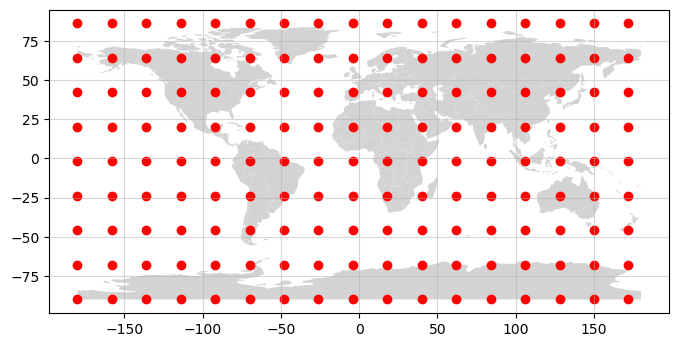

In [78]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres")).plot(color="lightgrey", ax=ax)
# parse dates for plot's title
# Unpack the x and y coordinates from lowres_locs
x_coords, y_coords = zip(*lowres_locs)

# Plot the points
plt.scatter(x_coords, y_coords, marker='o', color='red')
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

testy what it looks like with ocean mask

In [79]:
mask = np.load('../data/masks/ocean_mask.npy')
reduced_mask = mask[1:-1,2:-2]
reduced_mask.shape

(1000, 2000)

In [80]:
pooling_factor_rows = reduced_mask.shape[0] // num_long_points
pooling_factor_cols = reduced_mask.shape[1] // num_lat_points

# Reshape and apply average pooling
pooled_array = reduced_mask.reshape((num_long_points, pooling_factor_rows, num_lat_points, pooling_factor_cols)).mean(axis=(1, 3))

# Apply thresholding to convert average values to 0 or 1
threshold = 0.25
binary_pooled_array = (pooled_array > threshold).astype(int)
mask_inds = np.where(binary_pooled_array.reshape(-1) == 1)[0]

In [81]:
binary_pooled_array

array([[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [82]:
locs = utils.coord_grid(binary_pooled_array.shape)
locs = locs[mask_inds, :]

/var/folders/pp/c6m9_85s5rd16hbzmflk4b9r0000gn/T/ipykernel_84070/836985248.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


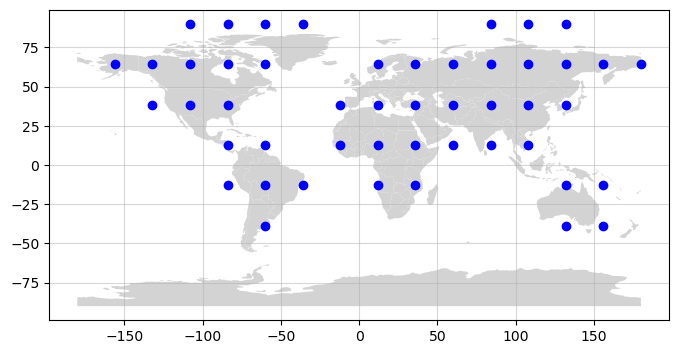

In [83]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres")).plot(color="lightgrey", ax=ax)
# parse dates for plot's title
# Unpack the x and y coordinates from lowres_locs
x_coords, y_coords = zip(*locs)

# Plot the points
plt.scatter(x_coords, y_coords, marker='o', color='blue')
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()